In [8]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# basic import 
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a dataset

In [2]:
from build_poly import build_poly
from standard import standardize 

# number of samples in the dataset
num_data = 100

# features
x = np.linspace(0.1, 2 * np.pi, num_data)

# observations
offset = 1
noiseLevel = 0.1
y = np.sin(x) + offset + noiseLevel * np.random.randn(num_data).T

# standardize 
x, mean_x, std_x = standardize(x)

# polynomial basis function
degree = 3
tx = build_poly(x[:, None], degree)

print(x.shape)
print(tx.shape)
print(y.shape)

(100,)
(100, 4)
(100,)


# Test Least Square 

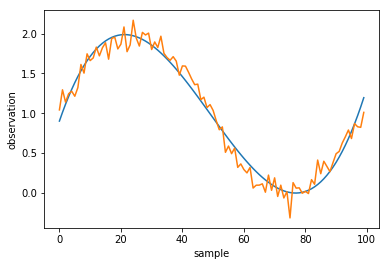

In [3]:
from implementations import least_squares

wls, loss = least_squares(y, tx)

# plot results
plt.figure()
plt.plot(tx.dot(wls))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test Ridge Regression

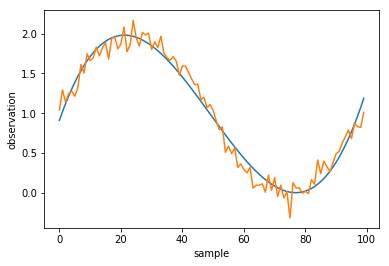

In [4]:
from implementations import ridge_regression

lambda_ = 0.1
wrr, loss = ridge_regression(y, tx, lambda_)

# plot results
plt.figure()
plt.plot(tx.dot(wrr))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test Least Squares Gradient Descent

Gradient Descent(149/149): loss MSE=0.01112748551142694


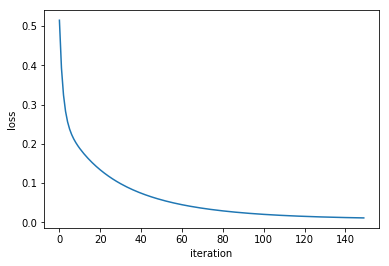

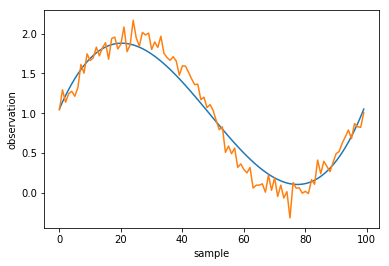

In [5]:
from implementations import least_squares_GD

# input parameters 
initial_w = np.zeros(tx.shape[1])
max_iters = 150
gamma = 1e-1

# least squares GD
w_tot, loss_tot = least_squares_GD(y, tx, initial_w, max_iters, gamma)

# plot results
plt.figure()
plt.plot(range(max_iters), loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(tx.dot(w_tot[-1]))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test Least Squares Stochastic Gradient Descent

Stochastic Gradient Descent(1999/1999): loss MSE=0.008663303662300767


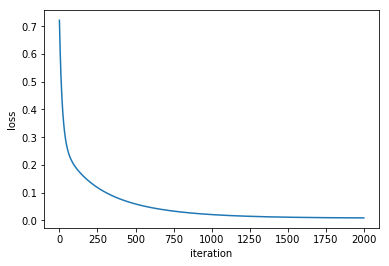

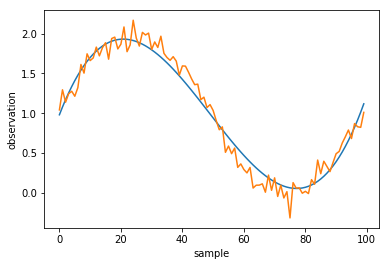

In [6]:
from implementations import least_squares_SGD

# input parameters 
initial_w = np.zeros(tx.shape[1])
max_iters = 2000
gamma = 1e-2
batch_size = 100

# least squares GD
w_tot, loss_tot = least_squares_SGD(y, tx, initial_w, max_iters, gamma, batch_size)

# plot results
plt.figure()
plt.plot(range(max_iters), loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(tx.dot(w_tot[-1]))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test logistic regression (GD)

Logistic Regression (999/999): loss MSE=12.850183936157624


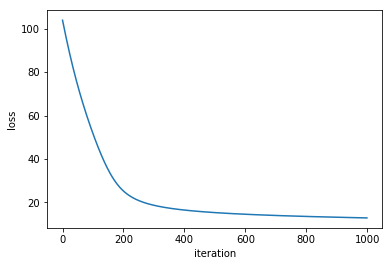

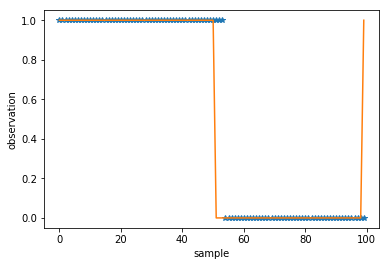

In [9]:
from implementations import logistic_regression
from proj1_helpers import predict_labels

# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# input parameters 
initial_w = np.ones(tx.shape[1])
max_iters = 1000
gamma = 1e-4
method = 'gd'

# logistic regression
w_tot, loss_tot = logistic_regression(ylabels, tx, initial_w, max_iters, gamma, method)

# predict labels
ypred = predict_labels(w_tot[-1], tx)

# plot results
plt.figure()
plt.plot(range(max_iters), loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(ypred, '*')
plt.plot(ylabels)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test logistic regression (Newton)

Logistic Regression (24/24): loss MSE=3.159605131369814


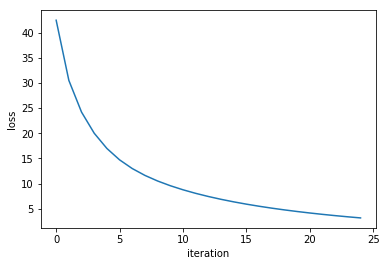

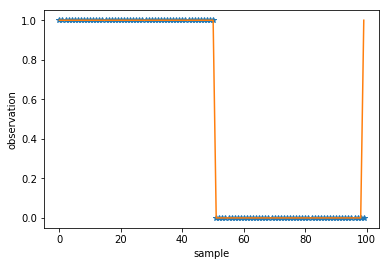

In [10]:
from implementations import logistic_regression
from proj1_helpers import predict_labels

# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# input parameters 
initial_w = np.ones(tx.shape[1])
max_iters = 25
gamma = 1e-1
method = 'newton'

# logistic regression
w_tot, loss_tot = logistic_regression(ylabels, tx, initial_w, max_iters, gamma, method)

# predict labels
ypred = predict_labels(w_tot[-1], tx)

# plot results
plt.figure()
plt.plot(range(max_iters), loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(ypred, '*')
plt.plot(ylabels)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test the regularized logistic regression (GD)

Logistic Regression Regularized (999/999): loss MSE=22.78856204216608


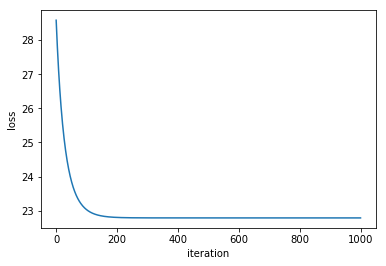

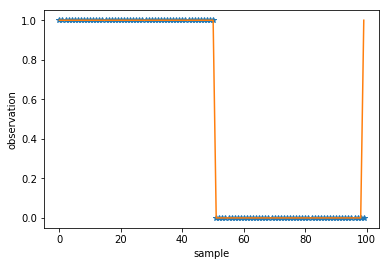

In [11]:
from implementations import reg_logistic_regression
from proj1_helpers import predict_labels

# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# input parameters 
initial_w = np.zeros(tx.shape[1])
max_iters = 1000
gamma = 1e-4
lambda_ = 100
method = 'gd'

# logistic regression
w_tot, loss_tot = reg_logistic_regression(ylabels, tx, initial_w, max_iters, gamma, method, lambda_)

# predict labels
ypred = predict_labels(w_tot[-1], tx)

# plot results
plt.figure()
plt.plot(range(max_iters), loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(ypred, '*')
plt.plot(ylabels)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

# Test the regularized logistic regression (Newton)

Logistic Regression Regularized (24/24): loss MSE=3.7264277815986353


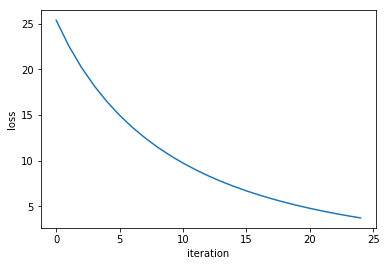

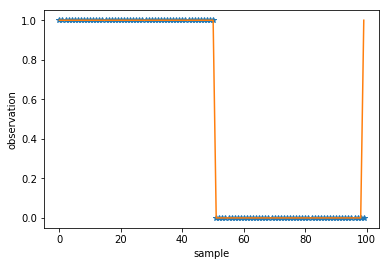

In [12]:
from implementations import reg_logistic_regression
from proj1_helpers import predict_labels

# build labels
ylabels = np.zeros(y.shape)
ylabels[np.where(y<=1)] = 0
ylabels[np.where(y>1)] = 1

# input parameters 
initial_w = np.zeros(tx.shape[1])
max_iters = 25
gamma = 1e-1
lambda_ = 0.01
method = 'newton'

# logistic regression
w_tot, loss_tot = reg_logistic_regression(ylabels, tx, initial_w, max_iters, gamma, method, lambda_)

# predict labels
ypred = predict_labels(w_tot[-1], tx)

# plot results
plt.figure()
plt.plot(range(max_iters), loss_tot)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.figure()
plt.plot(ypred, '*')
plt.plot(ylabels)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()